In [1]:
import pandas as pd
import plotly.express as px
import numpy as np

In [2]:
! pwd

/home/connes-v/Programmation/Projet/hackhathon_covid19


In [3]:
covidistress = pd.read_csv("./final/COVIDiSTRESS_region_date_FINAL.csv")
hospit = pd.read_csv("./final/hospit_formatted.csv")
coviprev = pd.read_csv("./coviprev/coviprevs_formatted.csv")
gtrends = pd.read_csv("./final/gtrends_features.csv")
twitter = pd.read_csv("./twitter/twitter_output.csv")
covidistress["date"] =  pd.to_datetime(covidistress["date"], utc = True)
hospit["date"] =  pd.to_datetime(hospit["date"], utc = True)
coviprev["date"] =  pd.to_datetime(coviprev["date"], utc = True)
gtrends["date"] =  pd.to_datetime(gtrends["date"], utc = True)
twitter["date"] =  pd.to_datetime(twitter["date"], utc = True)

In [4]:
twitter_features = [c + "_feature" for c in twitter.columns if "counts" in c]
twitter.rename({c: c + "_feature" for c in twitter_features}, inplace=True)
twitter_features = [c for c in twitter.columns if "counts" in c]
twitter[twitter_features] = (twitter[twitter_features]-twitter[twitter_features].min())/twitter[twitter_features].max()
twitter

Unnamed: 0                      date  anxiety_tweets_counts confinement  \
0             0 2019-01-07 00:00:00+00:00               0.024099         non   
1             1 2019-01-14 00:00:00+00:00               0.009286         non   
2             2 2019-01-21 00:00:00+00:00               0.004422         non   
3             3 2019-01-28 00:00:00+00:00               0.036480         non   
4             4 2019-02-04 00:00:00+00:00               0.090869         non   
..          ...                       ...                    ...         ...   
115         115 2021-03-22 00:00:00+00:00               0.371877         non   
116         116 2021-03-29 00:00:00+00:00               0.384258         non   
117         117 2021-04-05 00:00:00+00:00               0.353748         non   
118         118 2021-04-12 00:00:00+00:00               0.399293         non   
119         119 2021-04-19 00:00:00+00:00               0.393765         non   

     depression_tweets_counts  suicide_tweets_counts  \
0                    0.058928               0.011033   
1                    0.033634               0.000000   
2                    0.022370               0.026764   
3                    0.023872               0.018489   
4                    0.050194               0.055769   
..                        ...                    ...   
115                  0.314797               0.190363   
116                  0.316852               0.266388   
117                  0.284286               0.168297   
118                  0.288515               0.252941   
119                  0.294166               0.189501   

     psychiatrie_tweets_counts  psychologie_tweets_counts  
0                     0.007403                   0.001484  
1                     0.022347                   0.002679  
2                     0.020540                   0.002497  
3                     0.048448                   0.002844  
4                     0.027004                   0.004116  
..                         ...                        ...  
115                   0.092031                   0.029037  
116                   0.100615                   0.029055  
117                   0.077851                   0.022642  
118                   0.092691                   0.023113  
119                   0.137803                   0.027818  

[120 rows x 8 columns]

In [5]:
gtrends_features = [c for c in gtrends.columns if "feature" in c]
gtrends[gtrends_features] = gtrends[gtrends_features]/100
gtrends.sort_values(by="date", inplace=True)
gtrends.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
twitter.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
px.line(covidistress, x="date", color="region", y="loneliness_covidistress_target")

In [8]:
# covidistress = covidistress[covidistress.support > 10].drop(columns="support").sort_values(by="date")
covidistress = covidistress.drop(columns="support").sort_values(by="date")
covidistress

region                      date  \
79               Île-de-France 2020-03-30 00:00:00+00:00   
0         Auvergne-Rhône-Alpes 2020-04-06 00:00:00+00:00   
27                   Grand-Est 2020-04-06 00:00:00+00:00   
42                   Normandie 2020-04-06 00:00:00+00:00   
22         Centre-Val de Loire 2020-04-06 00:00:00+00:00   
..                         ...                       ...   
55          Nouvelle-Aquitaine 2020-05-25 00:00:00+00:00   
87               Île-de-France 2020-05-25 00:00:00+00:00   
78  Provence-Alpes-Côte d'Azur 2020-06-01 00:00:00+00:00   
63                   Occitanie 2020-06-01 00:00:00+00:00   
88               Île-de-France 2020-06-01 00:00:00+00:00   

    loneliness_covidistress_target  stress_covidistress_target  
79                        0.333333                    0.450000  
0                         0.341838                    0.479171  
27                        0.341358                    0.486019  
42                        0.319328                    0.469223  
22                        0.330221                    0.474066  
..                             ...                         ...  
55                        0.916667                    0.550000  
87                        0.194444                    0.558333  
78                        0.333333                    0.475000  
63                        0.000000                    0.425000  
88                        0.583333                    0.425000  

[89 rows x 4 columns]

In [9]:
px.line(hospit, x="date", color="region", y="incid_hosp_features_hospit")

In [10]:
hospit.sort_values(by="date")
hospit

region                      date  \
0     Auvergne-Rhône-Alpes 2020-03-23 00:00:00+00:00   
1     Auvergne-Rhône-Alpes 2020-03-30 00:00:00+00:00   
2     Auvergne-Rhône-Alpes 2020-04-06 00:00:00+00:00   
3     Auvergne-Rhône-Alpes 2020-04-13 00:00:00+00:00   
4     Auvergne-Rhône-Alpes 2020-04-20 00:00:00+00:00   
...                    ...                       ...   
1039         Île-de-France 2021-03-29 00:00:00+00:00   
1040         Île-de-France 2021-04-05 00:00:00+00:00   
1041         Île-de-France 2021-04-12 00:00:00+00:00   
1042         Île-de-France 2021-04-19 00:00:00+00:00   
1043         Île-de-France 2021-04-26 00:00:00+00:00   

      incid_hosp_features_hospit  incid_rea_features_hospit  \
0                            950                        145   
1                           2407                        586   
2                           2160                        433   
3                           1523                        212   
4                           1220                        153   
...                          ...                        ...   
1039                        3860                        963   
1040                        3703                        930   
1041                        4013                       1052   
1042                        3674                        922   
1043                        1820                        503   

      incid_dc_features_hospit  incid_rad_features_hospit  
0                           63                        188  
1                          197                        606  
2                          297                       1061  
3                          243                       1144  
4                          271                        973  
...                        ...                        ...  
1039                       435                       2533  
1040                       462                       2573  
1041                       567                       2951  
1042                       513                       2897  
1043                       286                       1721  

[1044 rows x 6 columns]

In [11]:
coviprev = coviprev.dropna().sort_values(by="date")
coviprev

region                      date  anxiete_target  \
0          Auvergne-Rhône-Alpes 2020-03-30 00:00:00+00:00            0.23   
300  Provence-Alpes-Côte d'Azur 2020-03-30 00:00:00+00:00            0.22   
270            Pays de la Loire 2020-03-30 00:00:00+00:00            0.18   
240                   Occitanie 2020-03-30 00:00:00+00:00            0.26   
210          Nouvelle-Aquitaine 2020-03-30 00:00:00+00:00            0.18   
..                          ...                       ...             ...   
89                     Bretagne 2020-10-19 00:00:00+00:00            0.22   
59      Bourgogne-Franche-Comté 2020-10-19 00:00:00+00:00            0.15   
29         Auvergne-Rhône-Alpes 2020-10-19 00:00:00+00:00            0.20   
329  Provence-Alpes-Côte d'Azur 2020-10-19 00:00:00+00:00            0.21   
359               Île-de-France 2020-10-19 00:00:00+00:00            0.17   

     depression_target  pbsommeil_target  hyg4mes_target  portmasque_target  
0                 0.18              0.62            0.48               0.14  
300               0.17              0.62            0.56               0.17  
270               0.15              0.57            0.40               0.14  
240               0.24              0.58            0.56               0.17  
210               0.18              0.60            0.48               0.15  
..                 ...               ...             ...                ...  
89                0.17              0.57            0.36               0.82  
59                0.11              0.64            0.35               0.75  
29                0.13              0.69            0.41               0.82  
329               0.12              0.66            0.42               0.74  
359               0.20              0.65            0.35               0.80  

[156 rows x 7 columns]

In [12]:
px.line(coviprev, x="date", color="region", y="anxiete_target")

In [13]:
feature_df = pd.merge(hospit, gtrends, on=["region", "date"], how="outer")
feature_df = pd.merge(feature_df, twitter, on="date", how="left")
feature_df

region                      date  \
0        Auvergne-Rhône-Alpes 2020-03-23 00:00:00+00:00   
1        Auvergne-Rhône-Alpes 2020-03-30 00:00:00+00:00   
2        Auvergne-Rhône-Alpes 2020-04-06 00:00:00+00:00   
3        Auvergne-Rhône-Alpes 2020-04-13 00:00:00+00:00   
4        Auvergne-Rhône-Alpes 2020-04-20 00:00:00+00:00   
...                       ...                       ...   
1182      Centre-Val de Loire 2020-03-16 00:00:00+00:00   
1183                 Bretagne 2020-03-16 00:00:00+00:00   
1184  Bourgogne-Franche-Comté 2020-03-16 00:00:00+00:00   
1185     Auvergne-Rhône-Alpes 2020-03-16 00:00:00+00:00   
1186                Grand-Est 2020-03-16 00:00:00+00:00   

      incid_hosp_features_hospit  incid_rea_features_hospit  \
0                          950.0                      145.0   
1                         2407.0                      586.0   
2                         2160.0                      433.0   
3                         1523.0                      212.0   
4                         1220.0                      153.0   
...                          ...                        ...   
1182                         NaN                        NaN   
1183                         NaN                        NaN   
1184                         NaN                        NaN   
1185                         NaN                        NaN   
1186                         NaN                        NaN   

      incid_dc_features_hospit  incid_rad_features_hospit  \
0                         63.0                      188.0   
1                        197.0                      606.0   
2                        297.0                     1061.0   
3                        243.0                     1144.0   
4                        271.0                      973.0   
...                        ...                        ...   
1182                       NaN                        NaN   
1183                       NaN                        NaN   
1184                       NaN                        NaN   
1185                       NaN                        NaN   
1186                       NaN                        NaN   

      anxiete_feature_gtrends  colere_feature_gtrends  \
0                    0.750000                0.485000   
1                    0.295000                0.500000   
2                    0.195000                0.460000   
3                    0.145000                0.520000   
4                    0.355000                0.255000   
...                       ...                     ...   
1182                 0.080000                0.140000   
1183                 0.410000                0.450000   
1184                 0.115000                0.170000   
1185                 0.400000                0.410000   
1186                 0.356667                0.406667   

      depression_feature_gtrends  ennui_feature_gtrends  ...  \
0                       0.405000                  0.000  ...   
1                       0.475000                  0.515  ...   
2                       0.415000                  0.090  ...   
3                       0.560000                  0.000  ...   
4                       0.215000                  0.685  ...   
...                          ...                    ...  ...   
1182                    0.120000                  0.000  ...   
1183                    0.380000                  0.000  ...   
1184                    0.230000                  0.240  ...   
1185                    0.180000                  0.370  ...   
1186                    0.203333                  0.150  ...   

      psychologue_feature_gtrends  stress_feature_gtrends  \
0                        0.155000                   0.705   
1                        0.200000                   0.575   
2                        0.210000                   0.535   
3                        0.195000                   0.445   
4                        0.360000                   0.590   
... 

In [14]:
df = pd.merge(pd.merge(coviprev, covidistress, on=["region", "date"], how="outer"),
              feature_df, on=["region", "date"], how="outer").sort_values("date")
print(df.shape[0], hospit.shape[0], gtrends.shape[0], coviprev.shape[0], covidistress.shape[0])
assert df.shape[0] >= max(hospit.shape[0], gtrends.shape[0], coviprev.shape[0], covidistress.shape[0])
df.date =  pd.to_datetime(df.date)
df

1187 1044 884 156 89


region                      date  anxiete_target  \
1055  Bourgogne-Franche-Comté 2020-01-06 00:00:00+00:00             NaN   
1054                 Bretagne 2020-01-06 00:00:00+00:00             NaN   
1053      Centre-Val de Loire 2020-01-06 00:00:00+00:00             NaN   
1052                    Corse 2020-01-06 00:00:00+00:00             NaN   
1051                Grand-Est 2020-01-06 00:00:00+00:00             NaN   
...                       ...                       ...             ...   
1043            Île-de-France 2021-04-26 00:00:00+00:00             NaN   
795                   Mayotte 2021-04-26 00:00:00+00:00             NaN   
837                 Normandie 2021-04-26 00:00:00+00:00             NaN   
878        Nouvelle-Aquitaine 2021-04-26 00:00:00+00:00             NaN   
422                     Corse 2021-04-26 00:00:00+00:00             NaN   

      depression_target  pbsommeil_target  hyg4mes_target  portmasque_target  \
1055                NaN               NaN             NaN                NaN   
1054                NaN               NaN             NaN                NaN   
1053                NaN               NaN             NaN                NaN   
1052                NaN               NaN             NaN                NaN   
1051                NaN               NaN             NaN                NaN   
...                 ...               ...             ...                ...   
1043                NaN               NaN             NaN                NaN   
795                 NaN               NaN             NaN                NaN   
837                 NaN               NaN             NaN                NaN   
878                 NaN               NaN             NaN                NaN   
422                 NaN               NaN             NaN                NaN   

      loneliness_covidistress_target  stress_covidistress_target  \
1055                             NaN                         NaN   
1054                             NaN                         NaN   
1053                             NaN                         NaN   
1052                             NaN                         NaN   
1051                             NaN                         NaN   
...                              ...                         ...   
1043                             NaN                         NaN   
795                              NaN                         NaN   
837                              NaN                         NaN   
878                              NaN                         NaN   
422                              NaN                         NaN   

      incid_hosp_features_hospit  ...  psychologue_feature_gtrends  \
1055                         NaN  ...                     0.505000   
1054                         NaN  ...                     0.530000   
1053                         NaN  ...                     0.580000   
1052                         NaN  ...                     0.000000   
1051                         NaN  ...                     0.586667   
...                          ...  ...                          ...   
1043                      1820.0  ...                          NaN   
795                          2.0  ...                          NaN   
837                        318.0  ...                          NaN   
878                        272.0  ...                          NaN   
422                         18.0  ...                          NaN   

      stress_feature_gtrends  suicide_feature_gtrends  \
1055                0.270000                 0.555000   
1054                0.460000                 0.410000   
1053                0.300000                 0.430000   
1052                0.000000                 0.170000   
1051                0.506667                 0.466667   
...                      ...                      ...   
1043                     NaN                      NaN   
795                      NaN                   

In [15]:
df_count = df.groupby("date")["loneliness_covidistress_target",
                   "anxiete_target",
                   "incid_rea_features_hospit",
                   twitter_features[0],
                   gtrends_features[0]].agg("count").rename(columns={"loneliness_covidistress_target": "covidistress",
                                                                     "anxiete_target": "coviprev",
                                                                      "incid_rea_features_hospit": "hospit",
                                                                      gtrends_features[0]: "gtrends",
                                                                      twitter_features[0]: "twitter"})
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='covidistress', x=df_count.index, y=df_count.covidistress),
    go.Bar(name='coviprev', x=df_count.index, y=df_count.coviprev),
    go.Bar(name='hospit', x=df_count.index, y=df_count.hospit),
    go.Bar(name='gtrends', x=df_count.index, y=df_count.gtrends),
    go.Bar(name='twitter', x=df_count.index, y=df_count.twitter)
])
# Change the bar mode
fig.show()


/home/connes-v/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [16]:
px.line(df, x="date", color="region", y="anxiete_target")

In [17]:
df.date.values, coviprev.date.values

(array(['2020-01-06T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
        '2020-01-06T00:00:00.000000000', ...,
        '2021-04-26T00:00:00.000000000', '2021-04-26T00:00:00.000000000',
        '2021-04-26T00:00:00.000000000'], dtype='datetime64[ns]'),
 array(['2020-03-30T00:00:00.000000000', '2020-03-30T00:00:00.000000000',
        '2020-03-30T00:00:00.000000000', '2020-03-30T00:00:00.000000000',
        '2020-03-30T00:00:00.000000000', '2020-03-30T00:00:00.000000000',
        '2020-03-30T00:00:00.000000000', '2020-03-30T00:00:00.000000000',
        '2020-03-30T00:00:00.000000000', '2020-03-30T00:00:00.000000000',
        '2020-03-30T00:00:00.000000000', '2020-03-30T00:00:00.000000000',
        '2020-04-06T00:00:00.000000000', '2020-04-06T00:00:00.000000000',
        '2020-04-06T00:00:00.000000000', '2020-04-06T00:00:00.000000000',
        '2020-04-06T00:00:00.000000000', '2020-04-06T00:00:00.000000000',
        '2020-04-06T00:00:00.000000000', '2020-04-06T00:00:00.000000000',

<AxesSubplot:title={'center':'Correlation Heatmap'}>

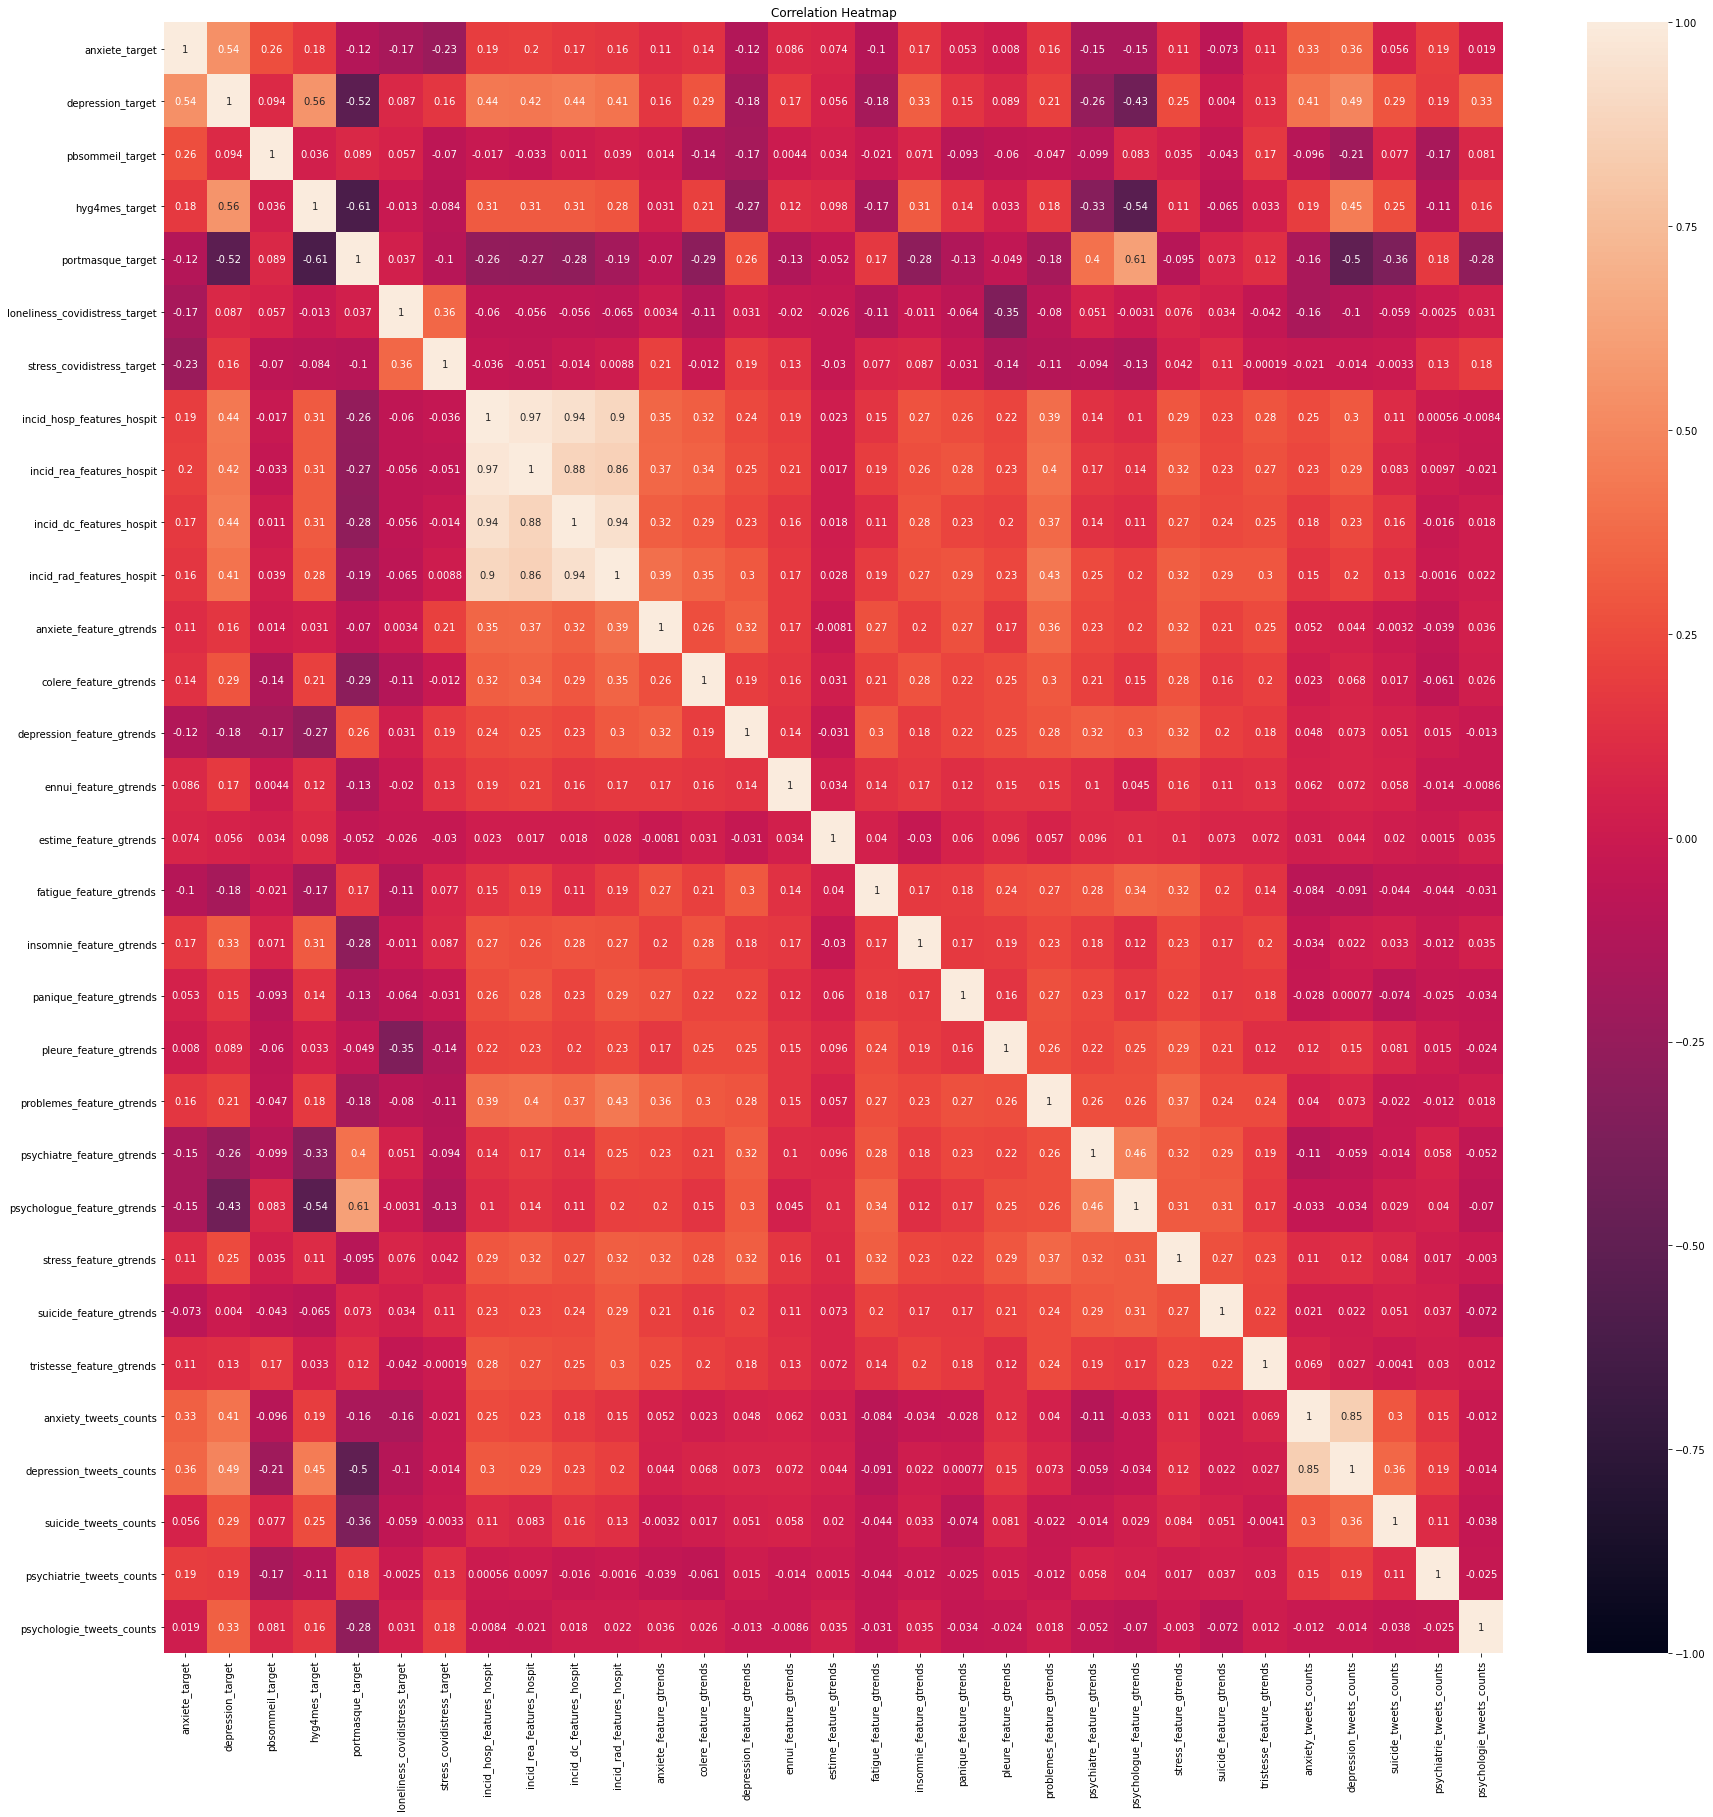

In [18]:
import seaborn as sns # plot library.
import matplotlib.pyplot as plt # plot library
corr = df.corr()
plt.subplots(figsize=(30,30))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

In [19]:
region_rmap =  df.region.value_counts().index.tolist()
df["region_id_feature"] = df.region.apply(lambda x: region_rmap.index(x))
features = [column for column in df.columns if "feature" in column]
target = [target for target in df.columns if "target" in target]
target_covidistress = [target for target in covidistress.columns if "target" in target]
target_coviprev = [target for target in coviprev.columns if "target" in target]

In [20]:
test = df[np.logical_or(np.logical_and(df.date < "2020-06-07", df.date > "2020-04-18"),
                        df.date >"2020-09-01")]
train = df[~df.index.isin(test.index)]

In [21]:
test.date.tolist()

[Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-27 00:00:00+0000', tz='UTC'),
 Timestamp('2020-04-27 00:00:00+0000', tz='UTC'),


In [22]:
assert not (set(test.index) & set(train.index))

In [23]:
import xgboost
import shap
from sklearn.metrics import median_absolute_error

/home/connes-v/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/connes-v/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/connes-v/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/connes-v/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be un

In [24]:
Xhts = train[features][~train.loneliness_covidistress_target.isnull()]
model = {}
for t in target_covidistress:
    model[t] = xgboost.XGBRegressor().fit(Xhts, train.loc[Xhts.index][t])

In [25]:
Xhtv = train[features][~train.anxiete_target.isnull()]
for t in target_coviprev:
    model[t] = xgboost.XGBRegressor().fit(Xhtv, train.loc[Xhtv.index][t])

In [26]:
explainers = {}
shap_values = {}
for t in model:
    X_t = test[~test[t].isnull()]
    y_pred = model[t].predict(X_t[features])
    y = X_t[t]
    print(t, f"MAE: {median_absolute_error(y, y_pred)}", f"data variance: {df[t].std()}")
    explainer = shap.Explainer(model[t])
    shap_value = explainer(X_t[features])
    explainers[t] = explainer
    shap_values[t] = shap_value

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


loneliness_covidistress_target MAE: 0.09464806318283081 data variance: 0.16061473526096956
stress_covidistress_target MAE: 0.02634250819683076 data variance: 0.042233606331198305
anxiete_target MAE: 0.021993544399738316 data variance: 0.036422470545373745


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


depression_target MAE: 0.027515387833118438 data variance: 0.04665001770837709
pbsommeil_target MAE: 0.03249142885208128 data variance: 0.046536048444161565


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


hyg4mes_target MAE: 0.045155097246170034 data variance: 0.06893815331607218
portmasque_target MAE: 0.17026407718658448 data variance: 0.18689783924904968


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


###  anxiete_target  ###


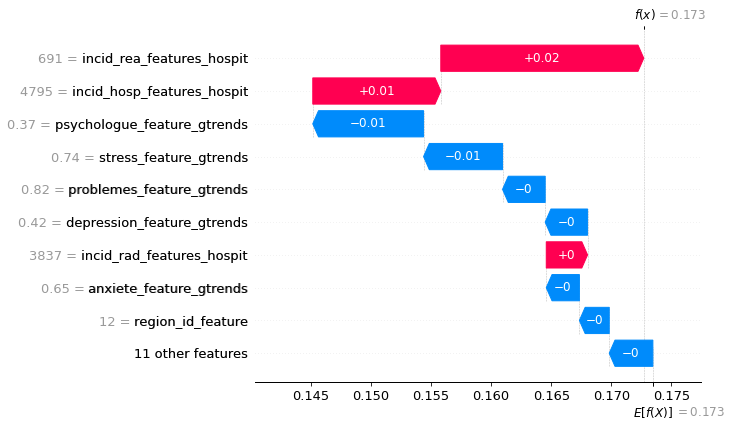

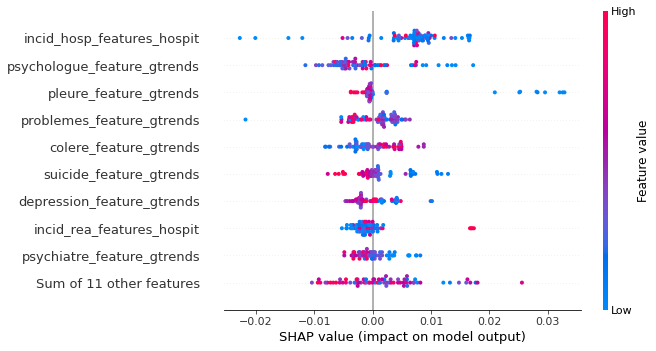

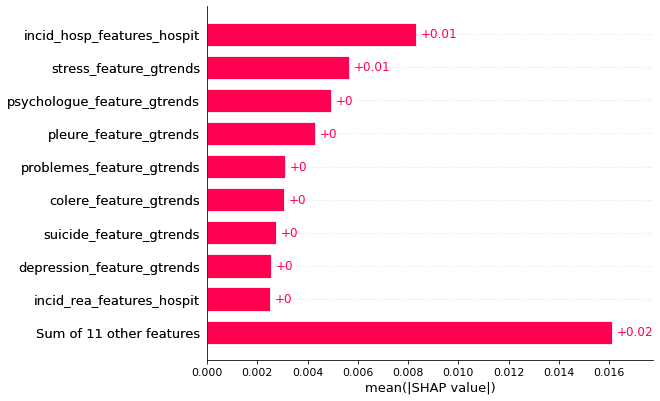

In [27]:
t = "anxiete_target"
print(f"###  {t}  ###")
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[t][0])
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[t][0])
# summarize the effects of all the features
shap.plots.beeswarm(shap_values[t])
shap.plots.bar(shap_values[t])

In [28]:
df_predict = df.copy()
for t in model:
    df_predict[f"{t}_pred"] = None
    y_pred = model[t].predict(df_predict[features])
    df_predict[f"{t}_pred"] = y_pred


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


In [29]:
df_predict.to_csv("prediction.csv")

In [30]:
df_predict

region                      date  anxiete_target  \
1055  Bourgogne-Franche-Comté 2020-01-06 00:00:00+00:00             NaN   
1054                 Bretagne 2020-01-06 00:00:00+00:00             NaN   
1053      Centre-Val de Loire 2020-01-06 00:00:00+00:00             NaN   
1052                    Corse 2020-01-06 00:00:00+00:00             NaN   
1051                Grand-Est 2020-01-06 00:00:00+00:00             NaN   
...                       ...                       ...             ...   
1043            Île-de-France 2021-04-26 00:00:00+00:00             NaN   
795                   Mayotte 2021-04-26 00:00:00+00:00             NaN   
837                 Normandie 2021-04-26 00:00:00+00:00             NaN   
878        Nouvelle-Aquitaine 2021-04-26 00:00:00+00:00             NaN   
422                     Corse 2021-04-26 00:00:00+00:00             NaN   

      depression_target  pbsommeil_target  hyg4mes_target  portmasque_target  \
1055                NaN               NaN             NaN                NaN   
1054                NaN               NaN             NaN                NaN   
1053                NaN               NaN             NaN                NaN   
1052                NaN               NaN             NaN                NaN   
1051                NaN               NaN             NaN                NaN   
...                 ...               ...             ...                ...   
1043                NaN               NaN             NaN                NaN   
795                 NaN               NaN             NaN                NaN   
837                 NaN               NaN             NaN                NaN   
878                 NaN               NaN             NaN                NaN   
422                 NaN               NaN             NaN                NaN   

      loneliness_covidistress_target  stress_covidistress_target  \
1055                             NaN                         NaN   
1054                             NaN                         NaN   
1053                             NaN                         NaN   
1052                             NaN                         NaN   
1051                             NaN                         NaN   
...                              ...                         ...   
1043                             NaN                         NaN   
795                              NaN                         NaN   
837                              NaN                         NaN   
878                              NaN                         NaN   
422                              NaN                         NaN   

      incid_hosp_features_hospit  ...  psychiatrie_tweets_counts  \
1055                         NaN  ...                   0.049248   
1054                         NaN  ...                   0.049248   
1053                         NaN  ...                   0.049248   
1052                         NaN  ...                   0.049248   
1051                         NaN  ...                   0.049248   
...                          ...  ...                        ...   
1043                      1820.0  ...                        NaN   
795                          2.0  ...                        NaN   
837                        318.0  ...                        NaN   
878                        272.0  ...                        NaN   
422                         18.0  ...                        NaN   

      psychologie_tweets_counts  region_id_feature  \
1055                   0.001537                  1   
1054                   0.001537                  8   
1053                   0.001537                  2   
1052                   0.001537                  3   
1051                   0.001537                  0   
...                         ...                ...   
1043                        NaN                 12   
795                         NaN                 15   
837                         NaN          

In [65]:
import plotly.graph_objects as go
cmap = px.colors.qualitative.Vivid
t = "anxiete_target"
r = "Provence-Alpes-Côte d'Azur"
fig = go.Figure(data=[go.Scatter(x=df_predict.loc[df_predict.region==r].date,
                           y=df_predict[t].loc[df_predict.region==r].values,
                           name=r,
                           mode="lines+markers",
                           line=dict(color=cmap[i])) for i, r in enumerate(['Île-de-France',
                                                                                 'Bourgogne-Franche-Comté',
                                                                                 'Normandie',
                                                                                 'Hauts-de-France',
                                                                                 'Grand-Est',
                                                                                 'Pays de la Loire',
                                                                                 'Bretagne',
                                                                                 'Nouvelle-Aquitaine',
                                                                                 'Occitanie',
                                                                                 'Auvergne-Rhône-Alpes',
                                                                                 "Provence-Alpes-Côte d'Azur"])]+\
                [go.Scatter(x=df_predict.loc[df_predict.region==r].date,
                           y=df_predict[t+ "_pred"].loc[df_predict.region==r].values,
                           name=r,
                           line=dict(dash='dash', color=cmap[i])) for i, r in enumerate(['Île-de-France',
                                                                                 'Bourgogne-Franche-Comté',
                                                                                 'Normandie',
                                                                                 'Hauts-de-France',
                                                                                 'Grand-Est',
                                                                                 'Pays de la Loire',
                                                                                 'Bretagne',
                                                                                 'Nouvelle-Aquitaine',
                                                                                 'Occitanie',
                                                                                 'Auvergne-Rhône-Alpes',
                                                                                 "Provence-Alpes-Côte d'Azur"])],
          layout=go.Layout(legend=dict(x=0,y=1)))
fig.write_html("predict.html")  